# Importing data and libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['retina'] 

In [2]:
info_patents = pd.read_pickle("../info_patents")

In [6]:
info_patents.head()

,patent_number,patent_date,patent_processing_time,ipc_section,assignee_id,wipos,marked
0,5387603,1995-02-07,433,"[A, C]",[5330279e-a21e-438c-80d1-7e6ae793c092],"[16, 14]",1.0
1,5771295,1998-06-23,552,[H],[2986e46e-7937-477f-9bc5-1f5eec05183f],[2],1.0
2,5585587,1996-12-17,832,[G],[f7152515-d420-42d9-a7b6-3a2796bc5d10],"[34, 2, 10]",1.0
3,5321490,1994-06-14,568,[G],[ec72750e-f789-4749-91f7-6292f7c6fda7],"[10, 12, 29]",1.0
4,5750497,1998-05-12,1161,"[A, C]",[9a3afa40-66e5-4921-b831-64287f2052e0],"[16, 15]",1.0


In [3]:
info_companies = pd.read_csv("./Data/info_companies.csv")

In [4]:
info_companies

,assignee_id,assignee_organization,assignee_type,assignee_lastknown_country,assignee_total_num_patents,assignee_total_num_inventors,nb_marked_patents,proportion_marked_patents,A,B,C,D,E,F,G,H
0,067e1110-7638-4840-8dfb-cc9434d518f1,INSTITUT PASTEUR,3,FR,821,1098,2,0.002,377,7,630,0,0,0,145,0
1,075fddd9-f31f-410e-a474-b4bb2283ef7e,Quinton Instrument Company,2,US,50,63,4,0.080,42,1,0,0,0,0,3,3
2,07dba387-b236-4355-bbfc-a2c33873f7a7,Cosmar Corporation,2,US,9,11,1,0.111,1,0,0,0,0,0,0,0
3,07ff496c-cec2-416d-9b5a-13a6fbd03c38,"Varitronic Systems, Inc.",2,US,18,16,1,0.056,0,10,0,0,0,0,0,0
4,0f63d31a-dac4-4326-afe8-e0d9ca77e826,SHIMADZU CORPORATION,3,JP,2479,1596,100,0.040,269,312,153,6,1,199,1343,782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,f0e041be-a8f1-4d48-a61a-c61599c4c1e8,"Forever Holdings, Inc.",2,US,18,12,1,0.056,1,4,0,0,0,1,0,1
2294,f406fe97-781d-4e57-baef-b85a0bec5db5,"Mangata, LLC",2,US,5,1,3,0.600,4,0,0,0,0,3,0,0
2295,fc7bd073-509e-4aeb-8f54-676f32956397,"Ryft Systems, Inc.",2,US,4,16,1,0.250,0,0,0,0,0,0,4,0
2296,fdd256e2-bbaa-4063-a960-6b0f0e0307b6,"NuVasive Specialized Orthopedics, Inc.",2,US,34,46,2,0.059,34,0,0,0,0,0,0,2


# Getting proportion of marked patents over unmarked for each company

In [10]:
list_companies = list(info_companies.assignee_id)
dict_companies = {key:0 for key in list_companies}

for section in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']:
    dict_companies = {key:0 for key in list_companies}
    for el in info_patents[info_patents[section]==1].assignee_id:
        if el!=None:
            for idi in el:
                if idi != None:
                    dict_companies[idi]+=1
    
    info_companies[section]=info_companies.assignee_id.map(dict_companies)

#info_companies['proportion_marked_patents']=(info_companies.nb_marked_patents/info_companies.assignee_total_num_patents).round(3)

info_companies

,assignee_id,assignee_organization,assignee_type,assignee_lastknown_country,assignee_total_num_patents,assignee_total_num_inventors,nb_marked_patents,proportion_marked_patents,A,B,C,D,E,F,G,H
0,067e1110-7638-4840-8dfb-cc9434d518f1,INSTITUT PASTEUR,3,FR,821,1098,2,0.002,377,7,630,0,0,0,145,0
1,075fddd9-f31f-410e-a474-b4bb2283ef7e,Quinton Instrument Company,2,US,50,63,4,0.080,42,1,0,0,0,0,3,3
2,07dba387-b236-4355-bbfc-a2c33873f7a7,Cosmar Corporation,2,US,9,11,1,0.111,1,0,0,0,0,0,0,0
3,07ff496c-cec2-416d-9b5a-13a6fbd03c38,"Varitronic Systems, Inc.",2,US,18,16,1,0.056,0,10,0,0,0,0,0,0
4,0f63d31a-dac4-4326-afe8-e0d9ca77e826,SHIMADZU CORPORATION,3,JP,2479,1596,100,0.040,269,312,153,6,1,199,1343,782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,f0e041be-a8f1-4d48-a61a-c61599c4c1e8,"Forever Holdings, Inc.",2,US,18,12,1,0.056,1,4,0,0,0,1,0,1
2294,f406fe97-781d-4e57-baef-b85a0bec5db5,"Mangata, LLC",2,US,5,1,3,0.600,4,0,0,0,0,3,0,0
2295,fc7bd073-509e-4aeb-8f54-676f32956397,"Ryft Systems, Inc.",2,US,4,16,1,0.250,0,0,0,0,0,0,4,0
2296,fdd256e2-bbaa-4063-a960-6b0f0e0307b6,"NuVasive Specialized Orthopedics, Inc.",2,US,34,46,2,0.059,34,0,0,0,0,0,0,2


In [152]:
#info_companies.to_csv('./Data/info_companies.csv',index=False)

[]

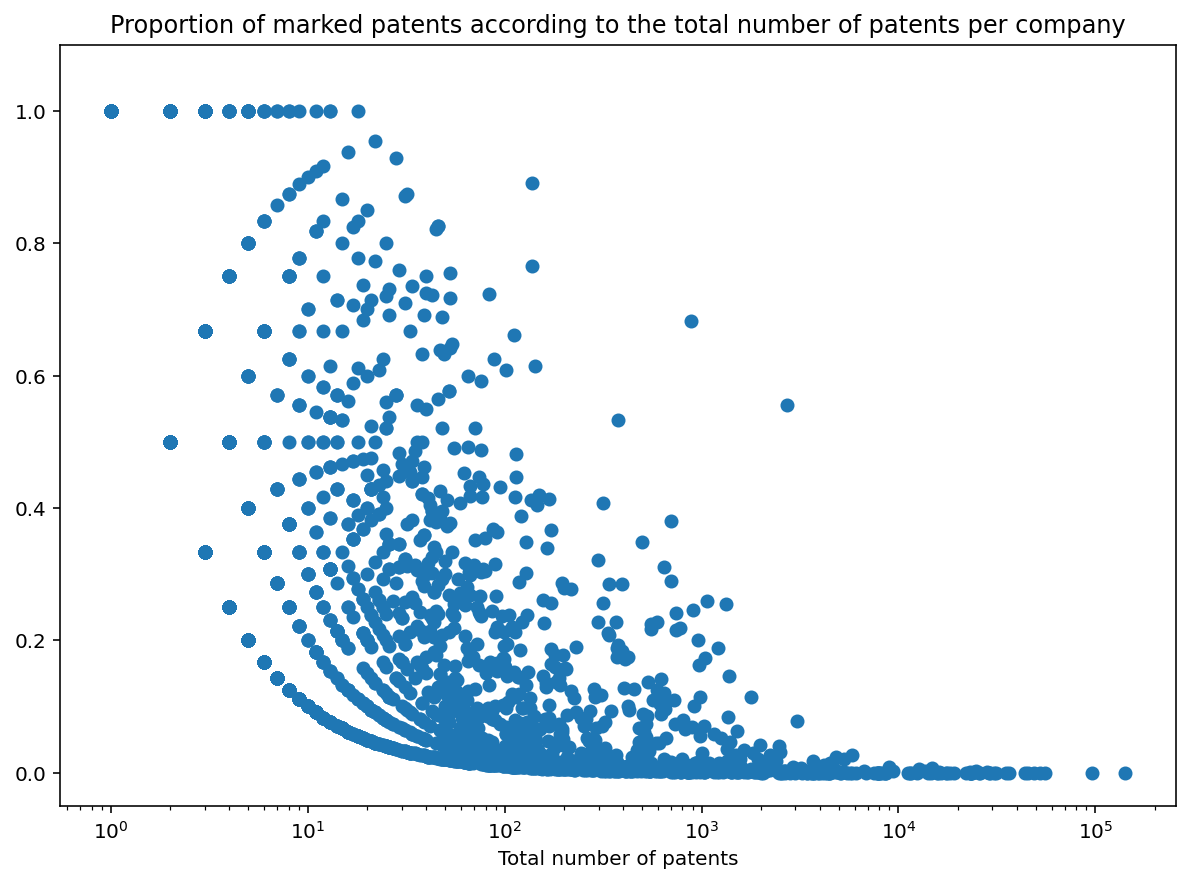

In [210]:
plt.figure(figsize=(10,7))
plt.scatter(info_companies.assignee_total_num_patents,info_companies.proportion_marked_patents,marker = 'o',label='proportion of marked patents')
plt.xscale('log')
plt.ylim(top=1.1)
plt.xlabel('Total number of patents')
plt.title("Proportion of marked patents according to the total number of patents per company")
plt.plot()

In [111]:
mean_prop = []

In [112]:
for el in list(np.unique(info_companies.assignee_total_num_patents)):
    tmp = np.mean(info_companies[info_companies.assignee_total_num_patents==el].proportion_marked_patents)
    mean_prop.append(tmp)

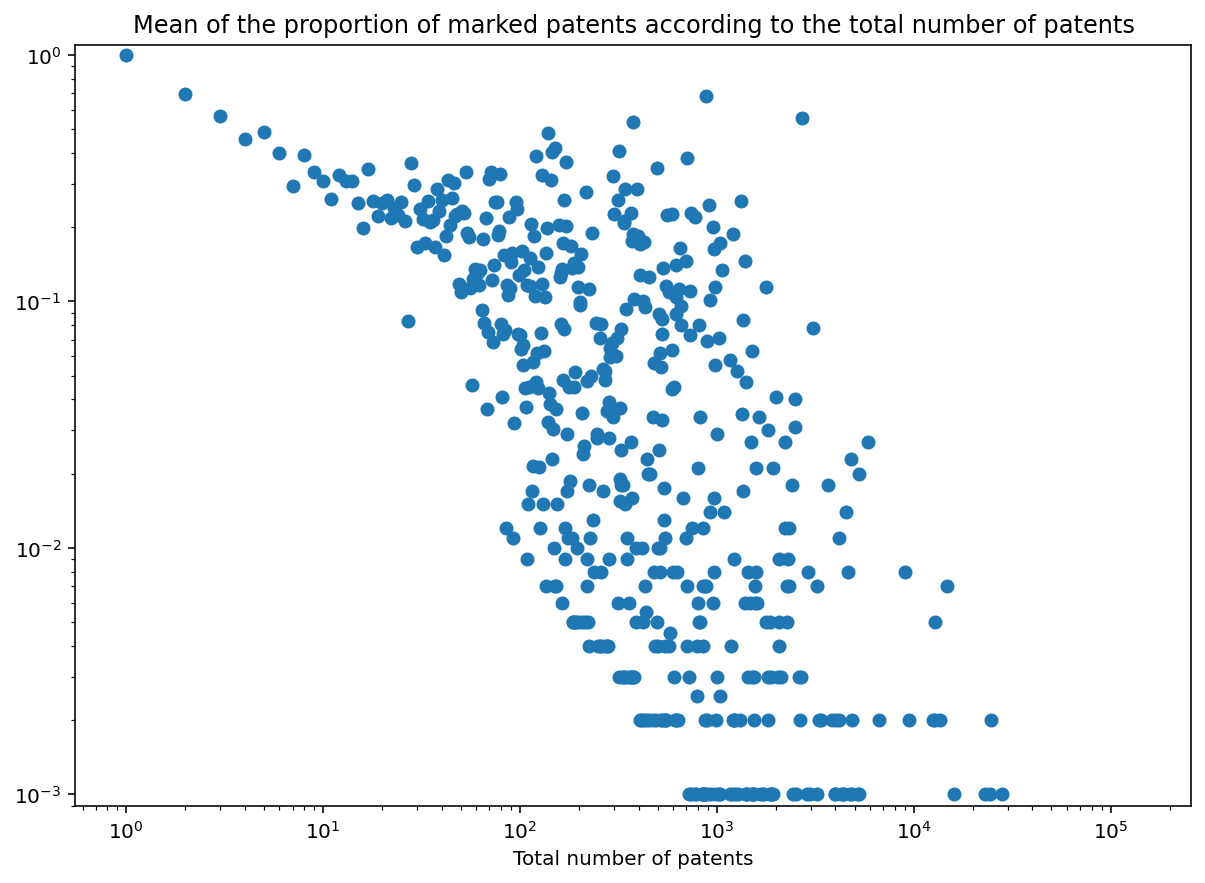

In [189]:
plt.figure(figsize=(10,7))
plt.scatter(list(np.unique(info_companies.assignee_total_num_patents)),mean_prop)
plt.xscale('log')
plt.yscale('log')
plt.ylim(top=1.1,bottom=0.0009)
plt.xlabel('Total number of patents')
plt.title('Mean of the proportion of marked patents according to the total number of patents')
plt.show()

Text(0.5, 1.0, 'Proportion of marked patents according to the total number of inventors for a given company')

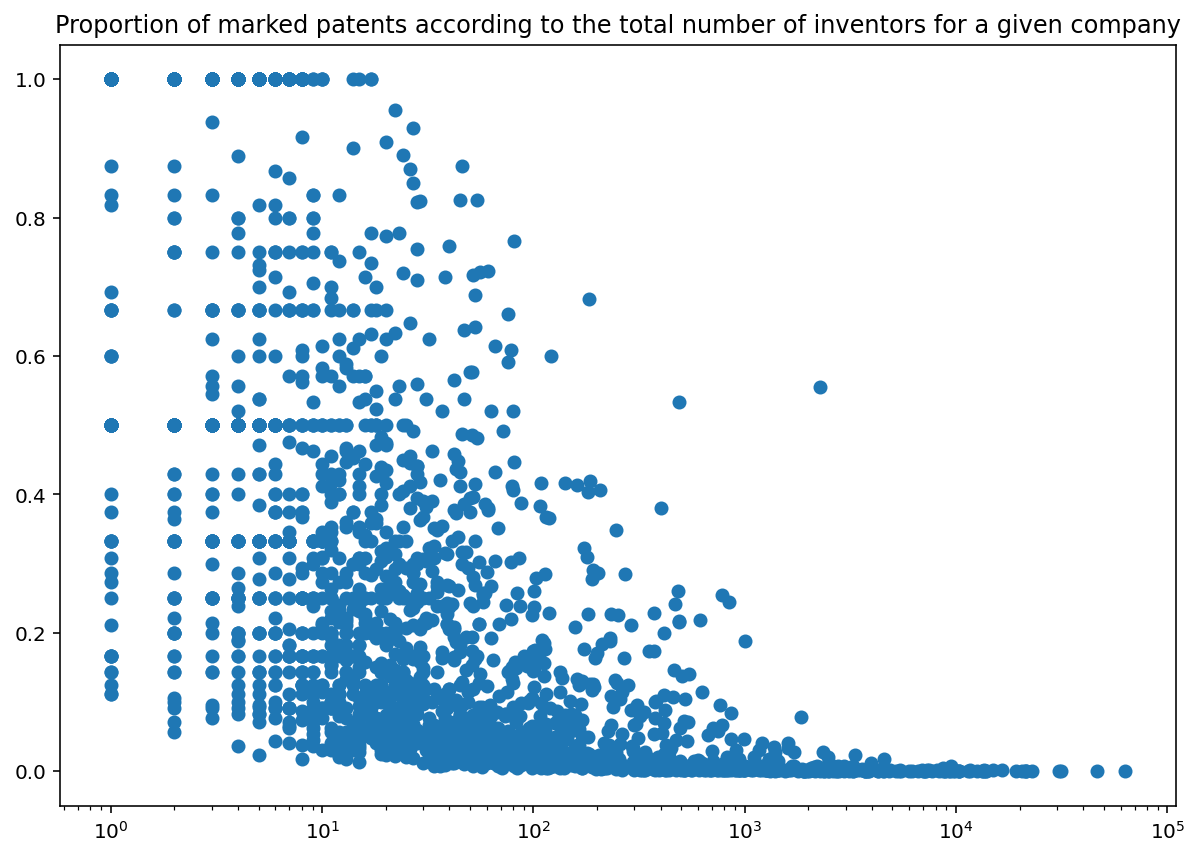

In [209]:
plt.figure(figsize=(10,7))
plt.scatter(info_companies.assignee_total_num_inventors,info_companies.proportion_marked_patents)
plt.xscale('log')
plt.title('Proportion of marked patents according to the total number of inventors for a given company')

[]

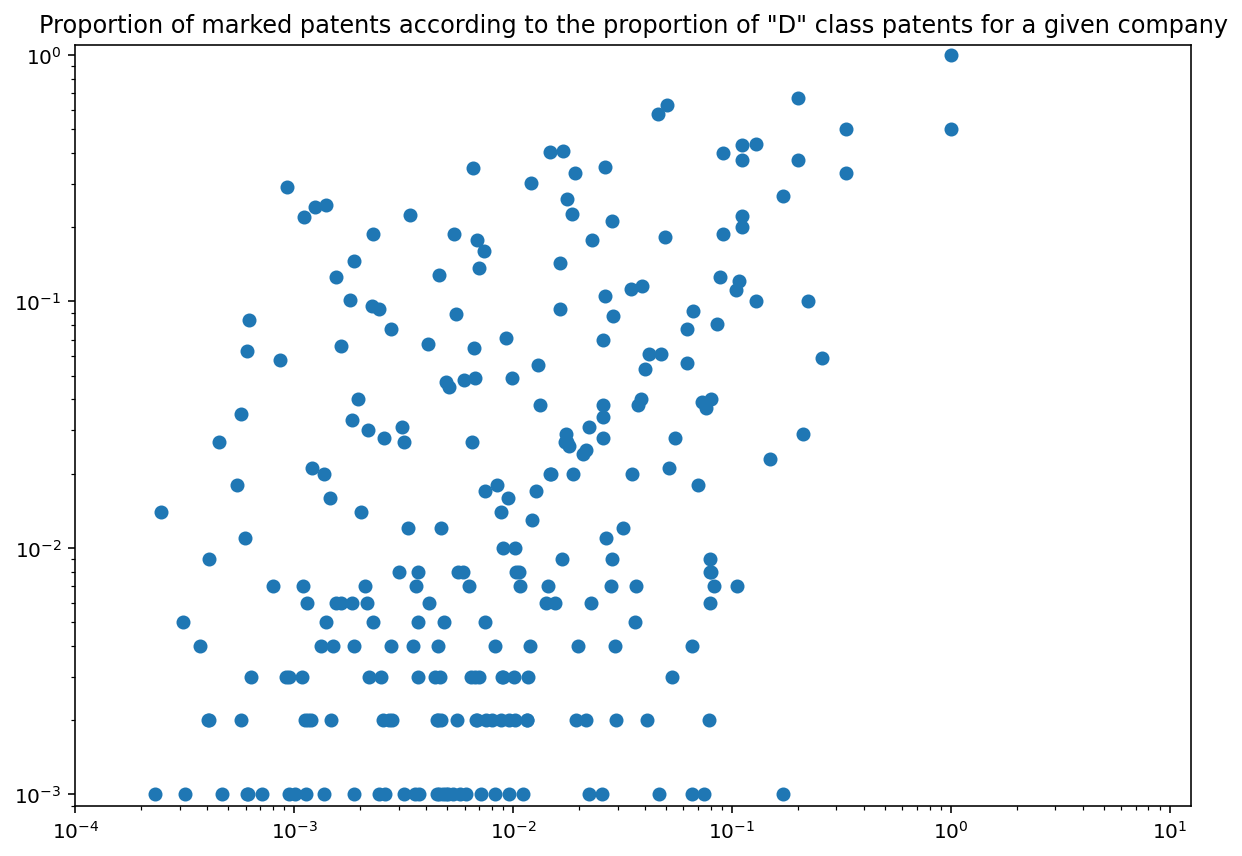

In [223]:
plt.figure(figsize=(10,7))
plt.scatter(info_companies.D/np.sum(info_companies[['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']],axis=1),info_companies.proportion_marked_patents)
plt.title('Proportion of marked patents according to the proportion of "D" class patents for a given company')
plt.xscale('log')
plt.yscale('log')
plt.xlim(left=0.0001)
plt.ylim(bottom=0.0009,top=1.1)
plt.plot()

# Cleaning the df of info_patents

In [3]:
info_patents = info_patents.dropna()

mlb = MultiLabelBinarizer()
dummies = pd.DataFrame(mlb.fit_transform(info_patents.ipc_section),columns=mlb.classes_, index=info_patents.index)
dummies = dummies[['A','B','C','D','E','F','G','H']]

for el in list(dummies.columns):
    info_patents[el]=dummies[el]

patents_to_drop = info_patents[(info_patents.A==0) & (info_patents.B==0) & (info_patents.C==0) & (info_patents.D==0) & (info_patents.E==0) & (info_patents.F==0) & (info_patents.G==0) & (info_patents.H==0)].patent_number
info_patents_red = info_patents[~info_patents.patent_number.isin(list(patents_to_drop))]
#info_patents_red = info_patents_red[info_patents_red.patent_processing_time.apply(lambda x: str(x).isdigit())].reset_index(drop=True)

In [4]:
info_patents = info_patents_red.reset_index(drop=True)

MemoryError: Unable to allocate 83.5 MiB for an array with shape (6, 1823832) and data type object

In [18]:
ipc_class = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
repartition_marked = []
repartition_unmarked = []
repartition_total = []

for index, el in enumerate(ipc_class):
    nb_marked = info_patents[info_patents.marked==1][el].value_counts()[1]
    nb_unmarked = info_patents[info_patents.marked==0][el].value_counts()[1]
    repartition_marked.append(nb_marked)
    repartition_unmarked.append(nb_unmarked)
    repartition_total.append(nb_marked+nb_unmarked)

In [19]:
np.sum(repartition_total)

1592034

<BarContainer object of 8 artists>

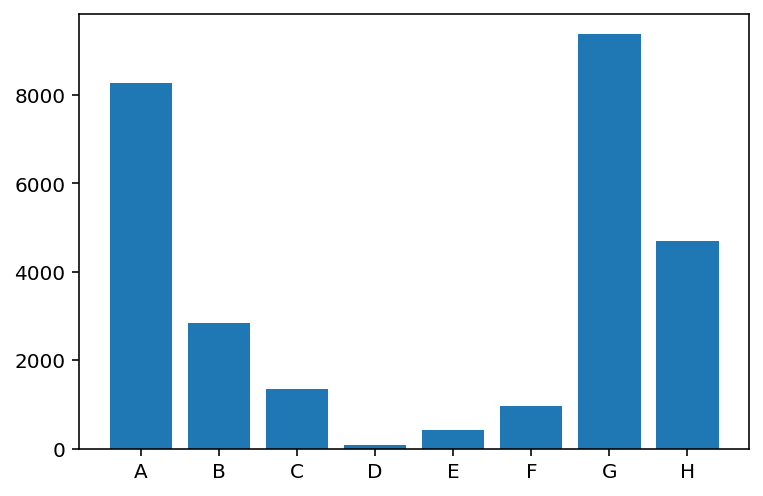

In [230]:
plt.bar(ipc_class,repartition_marked)

## erase patents before 2000, get quality_indicator into the patents database and histogram of ipc for marked/unmarked and sold/unsold

In [5]:
info_patents.head()
info_patents = info_patents.astype({"patent_number":"int64"})

MemoryError: Unable to allocate 13.9 MiB for an array with shape (1824051,) and data type int64

In [35]:
len(info_patents)

1441000

In [6]:
info_patents["year"] = pd.DatetimeIndex(info_patents['patent_date']).year
info_patents.drop(columns = ["patent_date"], inplace = True)
info_patents = info_patents[info_patents.year >= 2000]
info_patents.reset_index(drop = True, inplace = True)

MemoryError: Unable to allocate 69.6 MiB for an array with shape (5, 1824051) and data type object

In [27]:
info_patents["multi_ipc"] = np.array([(len(info_patents.iloc[j]['ipc_section']) > 1) for j in range(len(info_patents))])
info_patents["multi_ipc"] = info_patents["multi_ipc"].astype(int)
info_patents.head()

,patent_number,patent_processing_time,ipc_section,assignee_id,wipos,marked,A,B,C,D,E,F,G,H,year,multi_ipc
0,6127678,329,[H],[019b9aba-95cd-43bf-a8a5-e700229fddac],"[28, 25]",1.0,0,0,0,0,0,0,0,1,2000,0
1,6073289,908,[A],[e5fc32c3-a913-455a-94ce-9932d30eefff],[13],1.0,1,0,0,0,0,0,0,0,2000,0
2,6073290,944,[A],[3860ed0c-8e84-4bed-ba0b-9d7a57d3a6b9],"[29, 13]",1.0,1,0,0,0,0,0,0,0,2000,0
3,6064927,995,"[B, G]",[996d1179-2d0d-4a05-ac9f-32c3eb34fb69],"[10, 32]",1.0,0,1,0,0,0,0,1,0,2000,1
4,6029495,651,[G],[0f63d31a-dac4-4326-afe8-e0d9ca77e826],[10],1.0,0,0,0,0,0,0,1,0,2000,0


In [32]:
quality_indicators = pd.read_csv('../oecd_quality_uspto_jan20.csv')

In [34]:
quality_indicators.head()

,appln_id,pub_nbr,filing,tech_field,many_field,patent_scope,family_size,grant_lag,bwd_cits,npl_cits,...,claims_bwd,fwd_cits5,fwd_cits7,breakthrough,generality,originality,radicalness,renewal,quality_index_4,quality_index_6
0,49683821,US03951277,1976,25,0,1,5,106.0,5,0,...,NaN,0,0,0,NaN,0.812500,0.875000,0.0,0.412698,0.480100
1,48696358,US03956062,1976,27,0,1,1,0.0,7,0,...,NaN,1,1,0,0.0,0.444444,1.000000,0.0,0.072070,0.249299
2,51805403,US03960276,1976,25,0,2,10,83.0,4,0,...,NaN,0,2,0,NaN,0.720000,1.000000,0.0,0.246449,0.367851
3,51041941,US03963460,1976,24,1,3,7,72.0,5,0,...,NaN,0,1,0,NaN,0.728889,0.466667,0.0,0.268662,0.387728
4,51841776,US03963546,1976,26,0,2,1,82.0,6,0,...,NaN,0,1,0,NaN,0.743802,0.727273,0.0,0.113912,0.316085


0          6127678
1          6073289
2          6073290
3          6064927
4          6029495
            ...   
1440995    8386963
1440996    8386259
1440997    8386822
1440998    8386739
1440999    8386563
Name: patent_number, Length: 1441000, dtype: object

In [45]:
interest_quality_indic = quality_indicators[["appln_id", "quality_index_4", "quality_index_6"]]
info_patents = info_patents.join(interest_quality_indic.set_index('appln_id'), on='patent_number')
info_patents.head()
## only Nan values in quality like columns, so pb to fix

,patent_number,patent_processing_time,ipc_section,assignee_id,wipos,marked,A,B,C,D,E,F,G,H,year,multi_ipc,quality_index_4,quality_index_6
0,6127678,329,[H],[019b9aba-95cd-43bf-a8a5-e700229fddac],"[28, 25]",1.0,0,0,0,0,0,0,0,1,2000,0,NaN,NaN
1,6073289,908,[A],[e5fc32c3-a913-455a-94ce-9932d30eefff],[13],1.0,1,0,0,0,0,0,0,0,2000,0,NaN,NaN
2,6073290,944,[A],[3860ed0c-8e84-4bed-ba0b-9d7a57d3a6b9],"[29, 13]",1.0,1,0,0,0,0,0,0,0,2000,0,NaN,NaN
3,6064927,995,"[B, G]",[996d1179-2d0d-4a05-ac9f-32c3eb34fb69],"[10, 32]",1.0,0,1,0,0,0,0,1,0,2000,1,NaN,NaN
4,6029495,651,[G],[0f63d31a-dac4-4326-afe8-e0d9ca77e826],[10],1.0,0,0,0,0,0,0,1,0,2000,0,NaN,NaN


array([nan])